<a href="https://colab.research.google.com/github/serkanars/rnntextclassification/blob/master/topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

dataset = pd.read_excel('/content/drive/My Drive/uygulama/topic_modeling_colab.xlsx')

In [0]:
dataset.head()

,Class,Unnamed: 1,Text
0,government,B-PERSON I-PERSON O B-LOCATION O B-MISC O,"Corina Casanova , İsviçre Federal Şansölyesidir ."
1,government,B-PERSON I-PERSON O B-MISC O O,Corina Casanova bir federal parlementerdir .
2,government,B-ORGANIZATION I-ORGANIZATION I-ORGANIZATION O...,"İsviçre Dışişleri Bakanlığı , İsviçre federal ..."
3,government,B-LOCATION O O O O O,İsviçre'nin dış ilişkilerini sürdürmekle görev...
4,government,B-MISC B-PERSON O O O O O O O O O O B-PERSON O...,"Başbakan Milan Hoda , Südet Almanlarını yatışt..."


In [0]:
dataset = dataset.drop(['Unnamed: 1'], axis=1)

In [0]:
dataset.head()

,Class,Text
0,government,"Corina Casanova , İsviçre Federal Şansölyesidir ."
1,government,Corina Casanova bir federal parlementerdir .
2,government,"İsviçre Dışişleri Bakanlığı , İsviçre federal ..."
3,government,İsviçre'nin dış ilişkilerini sürdürmekle görev...
4,government,"Başbakan Milan Hoda , Südet Almanlarını yatışt..."


In [0]:
dataset.describe()

,Class,Text
count,533182,533182
unique,25,532583
top,people,Suudi Arabistan Profesyonel Ligi'nde mücadele ...
freq,128929,3


In [0]:
from collections import Counter

sum_ = Counter(dataset['Class']).values()
class_ = Counter(dataset['Class']).keys()

In [0]:
sum_

dict_values([19722, 3089, 88642, 20489, 8200, 42368, 21233, 11054, 14714, 128929, 32044, 8668, 5007, 7309, 52672, 7688, 8354, 21446, 3576, 7759, 4079, 3734, 4213, 1518, 6675])

In [0]:
class_

dict_keys(['government', 'law', 'location', 'tv', 'business', 'film', 'military', 'time', 'organization', 'people', 'sports', 'soccer', 'architecture', 'geography', 'music', 'royalty', 'education', 'book', 'travel', 'fictional_universe', 'opera', 'basketball', 'food', 'theater', 'religion'])

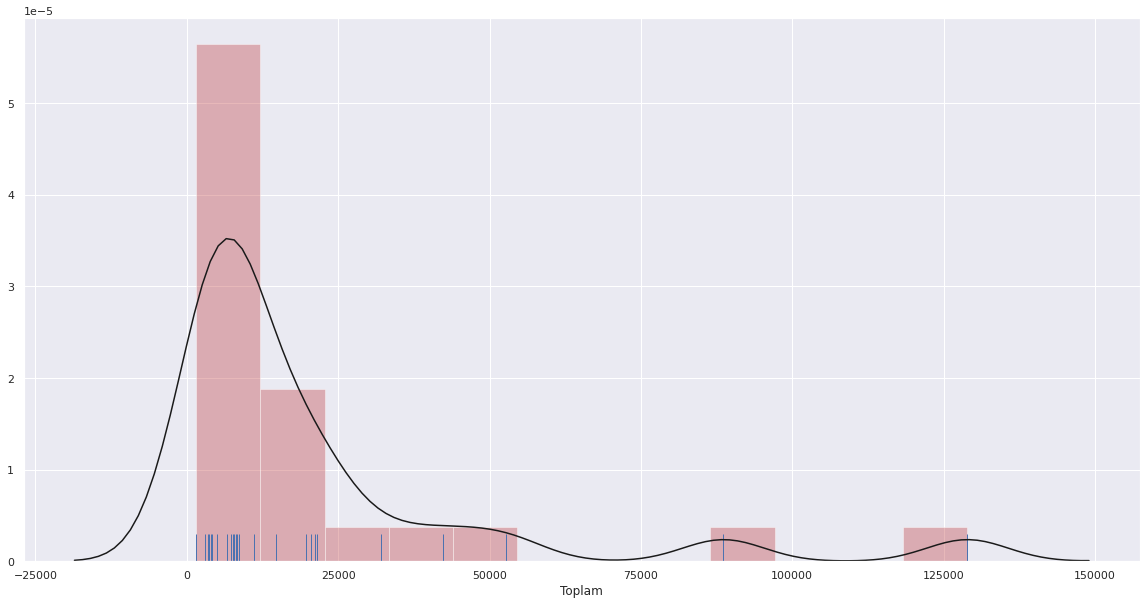

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

df_class = pd.DataFrame(zip(class_,sum_), columns = ['Class', 'Toplam'])

plt.figure(figsize=(20,10))
sns.set(color_codes=True)
sns.distplot(df_class.Toplam,rug = True, kde_kws={"color": "k"}, hist_kws={"color" : "r"});
plt.savefig('/content/drive/My Drive/uygulama/sınıfdagilim2.png')

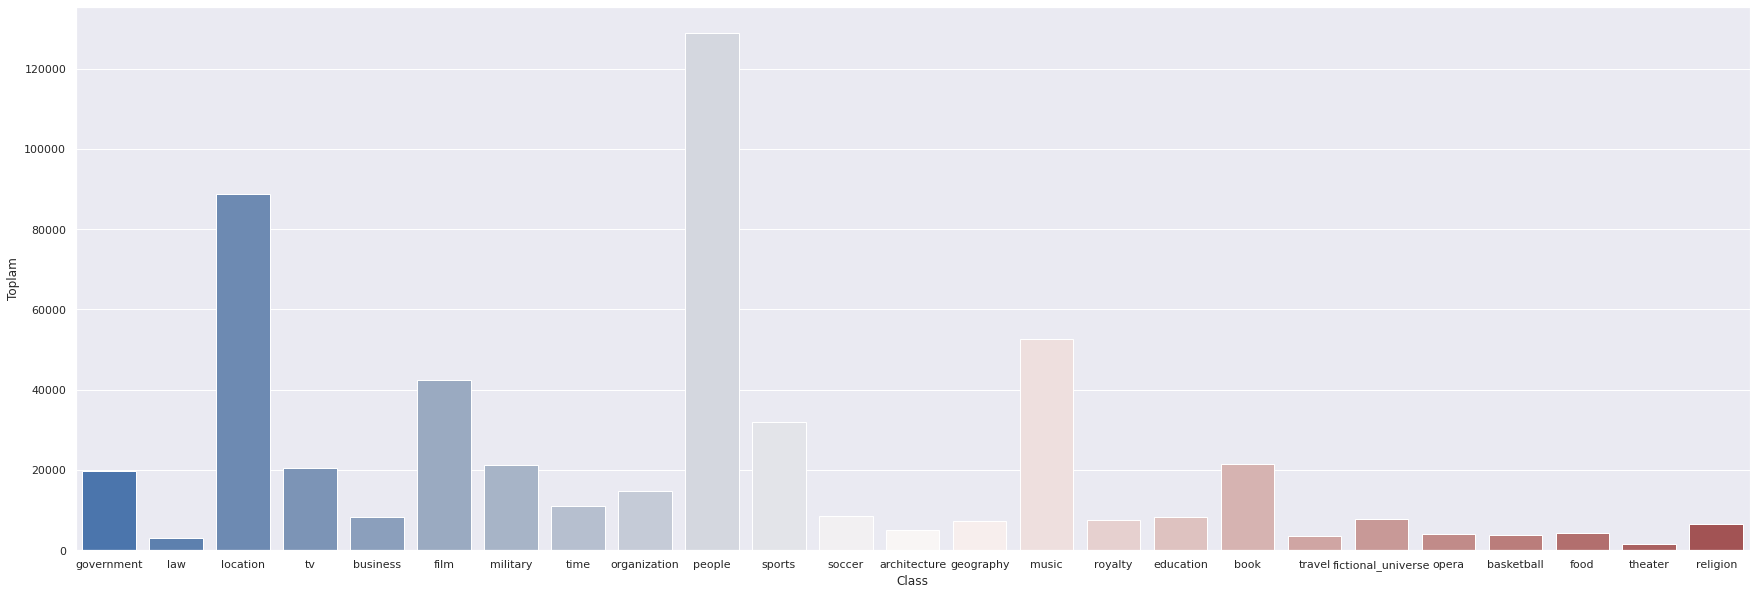

In [0]:
plt.figure(figsize=(30,10))
sns.set(color_codes=True)
#sns.lineplot(x = "Class", y = "Toplam", data = df_class, ax = ax[0,0]);
sns.barplot(x = "Class", y = "Toplam", data = df_class, palette="vlag")
plt.savefig('/content/drive/My Drive/uygulama/sınıfdagılım.png')

In [0]:
dataset['Text'] = dataset['Text'].apply(lambda x: x.lower())

In [0]:
import re
dataset['Text'] = dataset['Text'].apply(lambda x: re.sub("[,'\.!?();:$%&#]", '', x))

In [0]:
dataset['Text'] = dataset['Text'].apply(lambda x: x.strip())

In [0]:
import nltk
nltk.download('stopwords')

WPT = nltk.WordPunctTokenizer()
stop_word_list = nltk.corpus.stopwords.words('turkish')

def stopword_extraction(values):
    wordFilter = [word for word in values.split() if word not in stop_word_list]
    notStopword = " ".join(wordFilter)
    return notStopword
 
dataset['Text'] = dataset['Text'].apply(lambda x: stopword_extraction(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
dataset['Text'].head(20)

0        corina casanova i̇sviçre federal şansölyesidir
1            corina casanova bir federal parlementerdir
2     i̇sviçre dışişleri bakanlığı i̇sviçre federal ...
3     i̇sviçrenin dış ilişkilerini sürdürmekle görev...
4     başbakan milan hoda südet almanlarını yatıştır...
5     britanya başbakanı neville chamberlain berchte...
6                           alman devlet adamı şansölye
7     konrad hermann josef adenauer 5 ocakta katolik...
8     liseden mezun olduktan sonra freiburg münih bo...
9          1906dan itibaren köln belediye meclisi üyesi
10    1918 adenauer ömür boyu prusya senatosunun üye...
11    i̇mparator ii wilhelmin tahtı bırakmasının ard...
12    1921 adenauer bir yıl prusya devlet konseyinin...
13    1926 adenauer şansölyeliğe başvekilliğe adaylı...
14    1933 devlet konseyi başkanı adenauer anayasada...
15    belediye başkanı adenauer bir seçim gezisi ber...
16    adenauer kölnü terketti maria laach manastırın...
17    nazilerin eyalet başkanı adenauerin beledi

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(dataset.Text)

Using TensorFlow backend.


In [0]:
#her bir yorumu aynı boyuta getirmek gerekiyor RNN böyle çalışıyor.
X = tokenizer.texts_to_sequences(dataset['Text'])

In [0]:
import numpy as np

num_tokens = [len(tokens) for tokens in X]
num_tokens = np.array(num_tokens)
#burada token sayısı ayarlanırken ortalama etrafındaki değişkenlik dikkate alınarak bir sayı belirlenir
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

33

In [0]:
#belirlenen bu sayı verinin yüzde kaçını kapsadığına bakılır.
np.sum(num_tokens < max_tokens) / len(num_tokens)

0.9992535381914618

In [0]:
#veriler belirlenen token sayısına göre ayarlanır
X_pad = pad_sequences(X, maxlen=max_tokens)

In [0]:
#tokenlaştırılan kelimeler tekrar string hale geitirilmek için bir fonksiyon yazılması gerekiyor.
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))
#tokenlaştırılan cümleyi tekrar string hale getirmek
def tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [0]:
#y_train = pd.Series(y_train, dtype = "category")
#y_train = to_categorical(y_train.cat.codes)

In [0]:
Y = pd.get_dummies(dataset['Class']).values

In [0]:
print(Y.shape)

(533182, 25)


In [0]:
np.unique(Y)

array([0, 1], dtype=uint8)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_pad, Y, test_size = 0.25, random_state = 42)

In [0]:
x_train[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 1006, 6921,   20,   98,  464,   15, 8146,    9,  205],
      dtype=int32)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding,LSTM, Dropout
from keras.optimizers import Adam

num_labes = len(dataset.Class.unique())
embedding_size = max_tokens

model = Sequential()
model.add(Embedding(input_dim=10000,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))
model.add(LSTM(units=128,dropout = 0.2, return_sequences=True))
model.add(LSTM(units=128,dropout = 0.2, return_sequences=False))
model.add(Dense(num_labes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 33, 33)            330000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 33, 128)           82944     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 25)                3225      
Total params: 547,753
Trainable params: 547,753
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, validation_split=0.20, epochs=20,batch_size=1024)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 319908 samples, validate on 79978 samples
Epoch 1/20
319908/319908 [==============================] - 39s 122us/step - loss: 2.1893 - accuracy: 0.3812 - val_loss: 1.6872 - val_accuracy: 0.5118
Epoch 2/20
319908/319908 [==============================] - 38s 118us/step - loss: 1.6006 - accuracy: 0.5327 - val_loss: 1.5239 - val_accuracy: 0.5501
Epoch 3/20
319908/319908 [==============================] - 38s 118us/step - loss: 1.4832 - accuracy: 0.5582 - val_loss: 1.4691 - val_accuracy: 0.5599
Epoch 4/20
319908/319908 [==============================] - 38s 118us/step - loss: 1.4224 - accuracy: 0.5717 - val_loss: 1.4330 - val_accuracy: 0.5675
Epoch 5/20
319908/319908 [==============================] - 38s 118us/step - loss: 1.3802 - accuracy: 0.5815 - val_loss: 1.4121 - val_accuracy: 0.5711
Epoch 6/20
319908/319908 [==============================] - 38s 119us/step - loss: 1.3472 - accuracy: 0.5895 - val_loss: 1.3955 - val_accuracy: 0.5773
Epoch 7/20
319908/319908 [=================

In [0]:
model.save('/content/drive/My Drive/uygulama/lstm_model1.h5')

In [0]:
loss, acc = model.evaluate(x_test, y_test) 

133296/133296 [==============================] - 44s 334us/step


In [0]:
print(loss,acc)

1.3627658050438891 0.5872344374656677


In [0]:
y_pred = model.predict_classes(x_test,batch_size=1024, verbose=0)

In [0]:
y_pred

array([20, 13,  5, ..., 16, 15, 16])

In [0]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels

array([ 4, 19, 11, ...,  2,  3,  2])

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, y_pred)
cm

array([[  322,     1,    19,    23,    12,     4,    12,    17,    18,
           23,     4,   332,    12,    36,     2,    25,   207,    41,
            8,     2,    94,     0,    13,     4,     4],
       [    0,   263,     0,     1,     3,     1,    11,     0,     0,
            4,     0,    13,     0,     4,     0,     7,   182,     0,
            0,    14,   426,     0,     1,     0,     5],
       [   23,     0,  1405,   126,   191,    85,   494,    99,    32,
           78,    44,   392,   109,   123,    47,   101,  1593,   155,
           18,     2,    36,    19,    53,     2,   129],
       [   25,     4,    83,   600,    65,    19,    68,    86,    16,
           53,    65,   216,    34,    96,     2,   230,   258,    11,
            4,     8,    50,     0,    15,     1,    19],
       [   16,     3,   107,    69,   802,    10,    33,    17,     1,
           26,    19,   179,    10,    15,     1,    64,   634,    28,
            1,     0,    17,     0,     8,     1,    11],


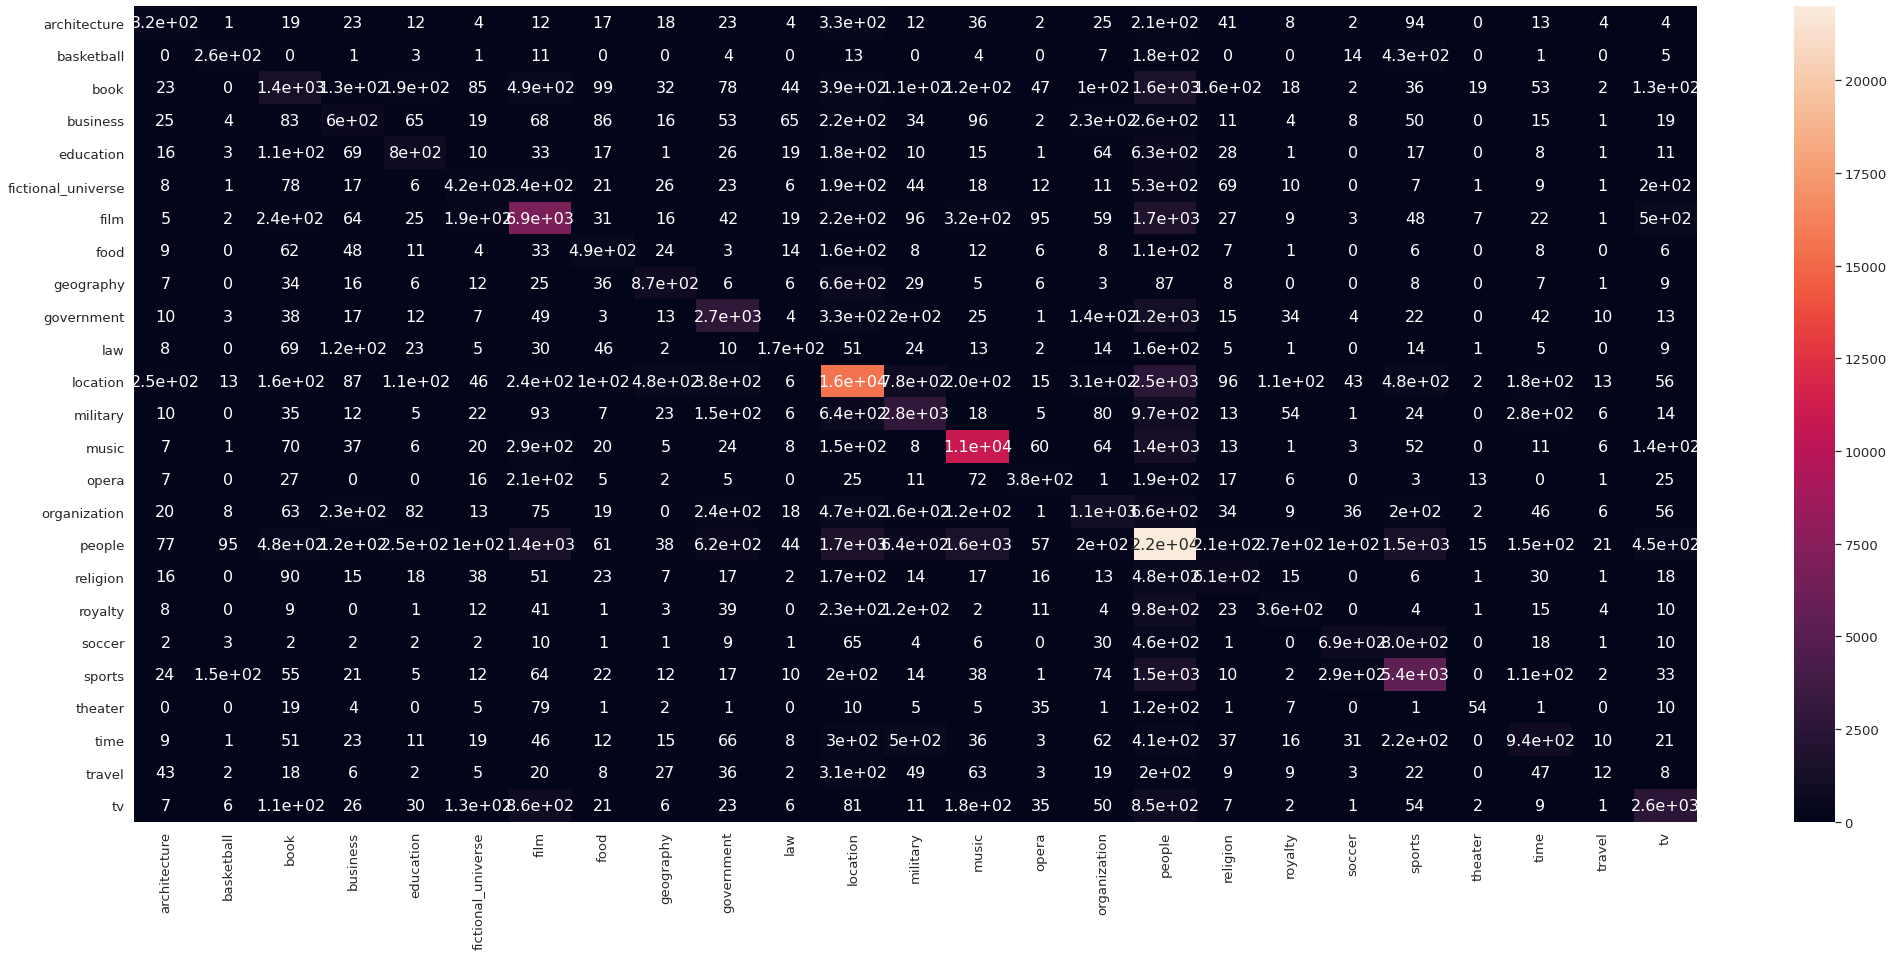

In [0]:
plt.figure(figsize=(35,15))
df = pd.DataFrame(cm, columns=np.unique(dataset['Class']),index=np.unique(dataset['Class']))
sns.set(font_scale=1.2)
sns.heatmap(df, annot=True, annot_kws={'size': 16});

In [0]:
#under sampling yöntemini araştır
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


rus = RandomUnderSampler(random_state = 0, sampling_strategy = "majority")
x_rus, y_rus = rus.fit_resample(X_pad, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
#smt = SMOTE(random_state = 0)
#x_smt, y_smt = smt.fit_resample(x_rus, y_rus)

In [0]:
print(len(x_rus))

405771


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size = 0.25, random_state = 42)

In [0]:
model2 = Sequential()
model2.add(Embedding(input_dim=10000,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))
model2.add(LSTM(units=128,dropout = 0.2, return_sequences=True))
model2.add(LSTM(units=128,dropout = 0.2, return_sequences=False))
model2.add(Dense(num_labes, activation = 'softmax'))
model2.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 33, 33)            330000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 33, 128)           82944     
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 25)                3225      
Total params: 547,753
Trainable params: 547,753
Non-trainable params: 0
_________________________________________________________________


In [0]:
history2 = model2.fit(x_train, y_train, validation_split=0.20, epochs=20,batch_size=1024)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 243462 samples, validate on 60866 samples
Epoch 1/20
243462/243462 [==============================] - 29s 120us/step - loss: 2.2683 - accuracy: 0.3589 - val_loss: 1.7201 - val_accuracy: 0.5149
Epoch 2/20
243462/243462 [==============================] - 28s 116us/step - loss: 1.6344 - accuracy: 0.5343 - val_loss: 1.5299 - val_accuracy: 0.5621
Epoch 3/20
243462/243462 [==============================] - 28s 116us/step - loss: 1.4626 - accuracy: 0.5773 - val_loss: 1.4197 - val_accuracy: 0.5914
Epoch 4/20
243462/243462 [==============================] - 28s 116us/step - loss: 1.3625 - accuracy: 0.6037 - val_loss: 1.3751 - val_accuracy: 0.6008
Epoch 5/20
243462/243462 [==============================] - 29s 117us/step - loss: 1.3052 - accuracy: 0.6170 - val_loss: 1.3513 - val_accuracy: 0.6064
Epoch 6/20
243462/243462 [==============================] - 28s 116us/step - loss: 1.2660 - accuracy: 0.6261 - val_loss: 1.3350 - val_accuracy: 0.6100
Epoch 7/20
243462/243462 [=================

In [0]:
#loss, acc = model.evaluate(x_test, y_test)

In [0]:
loss2, acc2 = model2.evaluate(x_test, y_test)

101443/101443 [==============================] - 34s 336us/step


In [0]:
#print("loss 1 : {}, acc 1 : {}".format(loss,acc))
print("loss 2 : {}, acc 2 : {}".format(loss2,acc2))

loss 2 : 1.3396260495354742, acc 2 : 0.6127480268478394


Text(0.5, 0, 'Epoch')

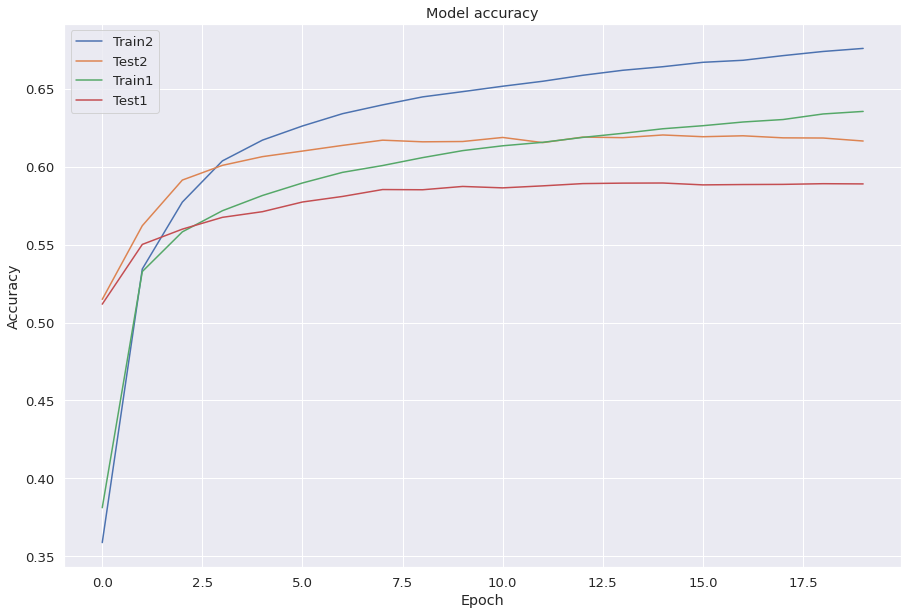

In [0]:
plt.figure(figsize = (15,10))
#plt.plot(history2.history['accuracy'])
#plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train2', 'Test2','Train1', 'Test1'], loc='upper left')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [0]:
from keras.utils import plot_model, model_to_dot

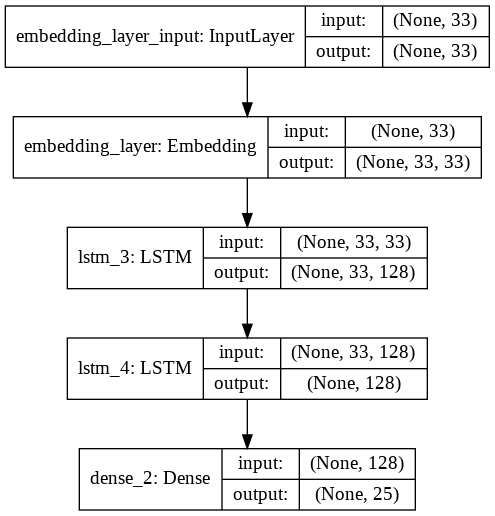

In [0]:
plot_model(model2, show_shapes=True)

In [0]:
y_pred2 = model2.predict_classes(x_test,batch_size=1024, verbose=0)

In [0]:
rounded_labels2=np.argmax(y_test, axis=1)

In [0]:
cm2 = confusion_matrix(rounded_labels2, y_pred2)

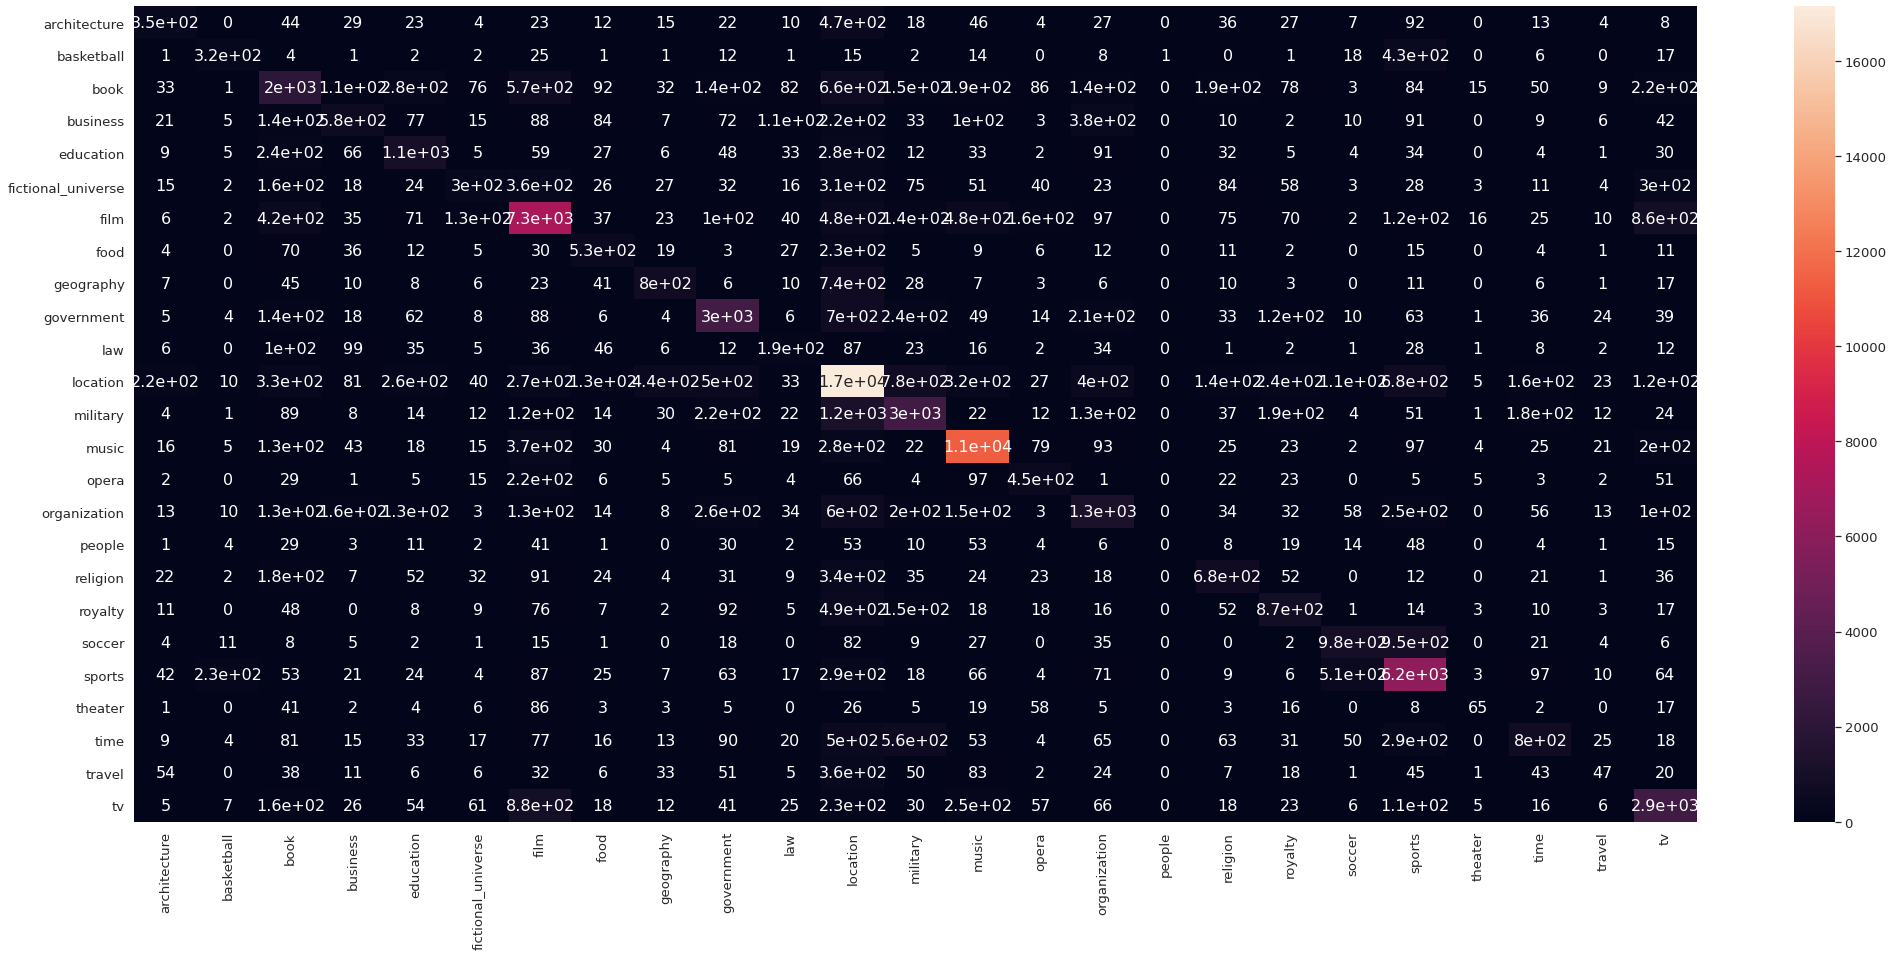

In [0]:
plt.figure(figsize=(35,15))
df2 = pd.DataFrame(cm2, columns=np.unique(dataset['Class']),index=np.unique(dataset['Class']))
sns.set(font_scale=1.2)
sns.heatmap(df2, annot=True, annot_kws={'size': 16});